In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create DataFrame from the data
data = pd.read_csv('clean_data.csv')
df = pd.DataFrame(data)

In [3]:
# Convert price to numeric, removing '$' and ',' if present
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Agency representation analysis
agency_counts = df['listing_agency'].value_counts()
top_agencies = agency_counts.head(10)

print("Top 10 agencies by number of listings:")
print(top_agencies)

# Calculate market share
total_listings = len(df)
market_share = (agency_counts / total_listings * 100).round(2)

print("\nMarket share of top 10 agencies:")
print(market_share.head(10))


Top 10 agencies by number of listings:
listing_agency
Real Estate Central - DARWIN CITY                  52
Call2View Real Estate - Palmerston                 34
Elders Real Estate - Palmerston                    33
First National Real Estate O'Donoghues - Darwin    32
Knight Frank (NT) - Darwin                         30
Raine & Horne - Darwin                             26
Elders Real Estate - Darwin                        26
For Sale By Owner                                  23
Renee's Realty NT - DURACK                         23
LJ Hooker Darwin -                                 23
Name: count, dtype: int64

Market share of top 10 agencies:
listing_agency
Real Estate Central - DARWIN CITY                  7.41
Call2View Real Estate - Palmerston                 4.84
Elders Real Estate - Palmerston                    4.70
First National Real Estate O'Donoghues - Darwin    4.56
Knight Frank (NT) - Darwin                         4.27
Raine & Horne - Darwin                             

In [4]:
# Property type focus
print("\nProperty type focus for top 5 agencies:")
for agency in top_agencies.head().index:
    print(f"\n{agency}:")
    print(df[df['listing_agency'] == agency]['property_type'].value_counts())



Property type focus for top 5 agencies:

Real Estate Central - DARWIN CITY:
property_type
House                   22
Apartment               14
Unit                    12
Townhouse                2
Duplex/Semi-detached     2
Name: count, dtype: int64

Call2View Real Estate - Palmerston:
property_type
House                   28
Apartment                2
Unit                     2
Townhouse                1
Duplex/Semi-detached     1
Name: count, dtype: int64

Elders Real Estate - Palmerston:
property_type
House                   22
Unit                     6
Townhouse                3
Duplex/Semi-detached     2
Name: count, dtype: int64

First National Real Estate O'Donoghues - Darwin:
property_type
Apartment               16
House                    8
Unit                     3
Villa                    2
Duplex/Semi-detached     2
Townhouse                1
Name: count, dtype: int64

Knight Frank (NT) - Darwin:
property_type
Apartment    18
House        11
Townhouse     1
Name: count

In [5]:
# Price range analysis
price_analysis = df.groupby('listing_agency')['price'].agg(['mean', 'min', 'max']).round(0)
print("\nPrice analysis for top 10 agencies:")
print(price_analysis.loc[top_agencies.index])


Price analysis for top 10 agencies:
                                                     mean       min       max
listing_agency                                                               
Real Estate Central - DARWIN CITY                494135.0  165000.0  795000.0
Call2View Real Estate - Palmerston               506559.0  244000.0  950000.0
Elders Real Estate - Palmerston                  535894.0  209000.0  895000.0
First National Real Estate O'Donoghues - Darwin  578250.0  260000.0  868000.0
Knight Frank (NT) - Darwin                       511033.0  190000.0  895000.0
Raine & Horne - Darwin                           477692.0  130000.0  775000.0
Elders Real Estate - Darwin                      478538.0  195000.0  830000.0
For Sale By Owner                                514217.0  200000.0  800000.0
Renee's Realty NT - DURACK                       516870.0  200000.0  899000.0
LJ Hooker Darwin -                               452565.0  149000.0  850000.0


In [6]:

# Geographic focus
print("\nTop 3 locations for top 5 agencies:")
for agency in top_agencies.head().index:
    print(f"\n{agency}:")
    print(df[df['listing_agency'] == agency]['city'].value_counts().head(3))




Top 3 locations for top 5 agencies:

Real Estate Central - DARWIN CITY:
city
Darwin City    15
Wagaman         3
Driver          3
Name: count, dtype: int64

Call2View Real Estate - Palmerston:
city
Rosebery       7
Darwin City    4
Bakewell       4
Name: count, dtype: int64

Elders Real Estate - Palmerston:
city
Bakewell    6
Gunn        6
Durack      3
Name: count, dtype: int64

First National Real Estate O'Donoghues - Darwin:
city
Darwin City    15
Millner         2
Rosebery        2
Name: count, dtype: int64

Knight Frank (NT) - Darwin:
city
Darwin City    19
Rosebery        3
Driver          1
Name: count, dtype: int64


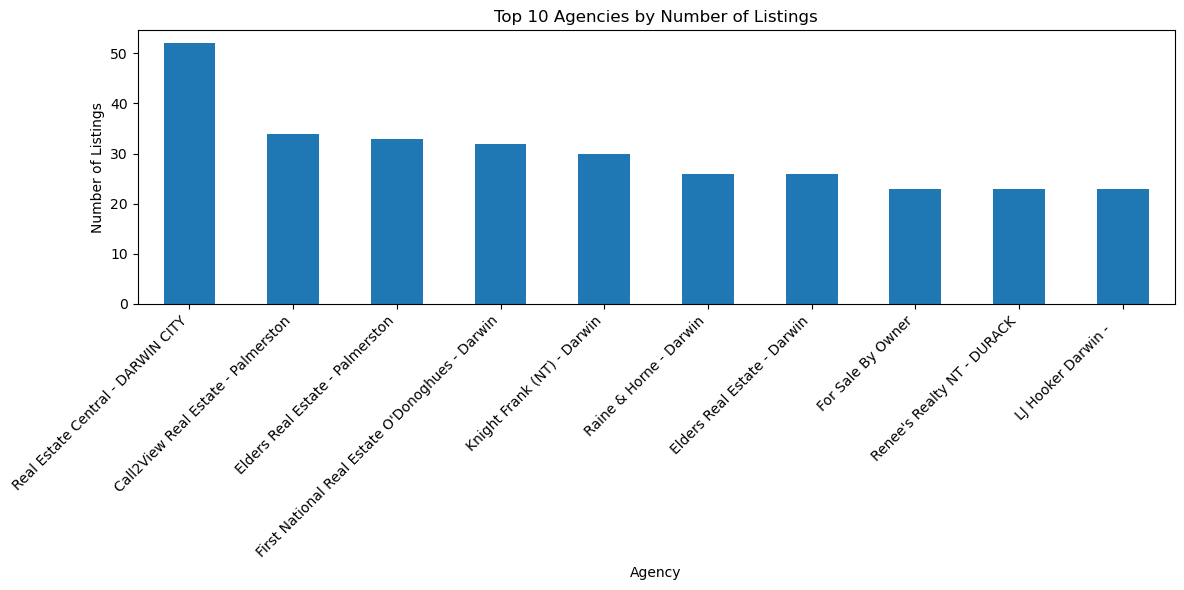

In [7]:
# Visualizations
plt.figure(figsize=(12, 6))
top_agencies.plot(kind='bar')
plt.title('Top 10 Agencies by Number of Listings')
plt.xlabel('Agency')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Fig1.png")
plt.show()



In [8]:
print(df)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
print(df)

    property_type                                   listing_agency     price  \
0           House                      Professionals - DARWIN CITY  435000.0   
1       Apartment  Nick Mousellis Real Estate - Eview Group Member  320000.0   
2            Unit                Habitat Real Estate - THE GARDENS  310000.0   
3           House                           Ray White - NIGHTCLIFF  259000.0   
4            Unit              Carol Need Real Estate - Fannie Bay  439000.0   
..            ...                                              ...       ...   
697         House                Real Estate Central - DARWIN CITY  495000.0   
698         House           Kassiou Constructions - HOWARD SPRINGS  601000.0   
699         House           Kassiou Constructions - HOWARD SPRINGS  655000.0   
700         House           Kassiou Constructions - HOWARD SPRINGS  675000.0   
701          Unit                            Home Zone NT - DARWIN  399000.0   

     location_number         city  zip_

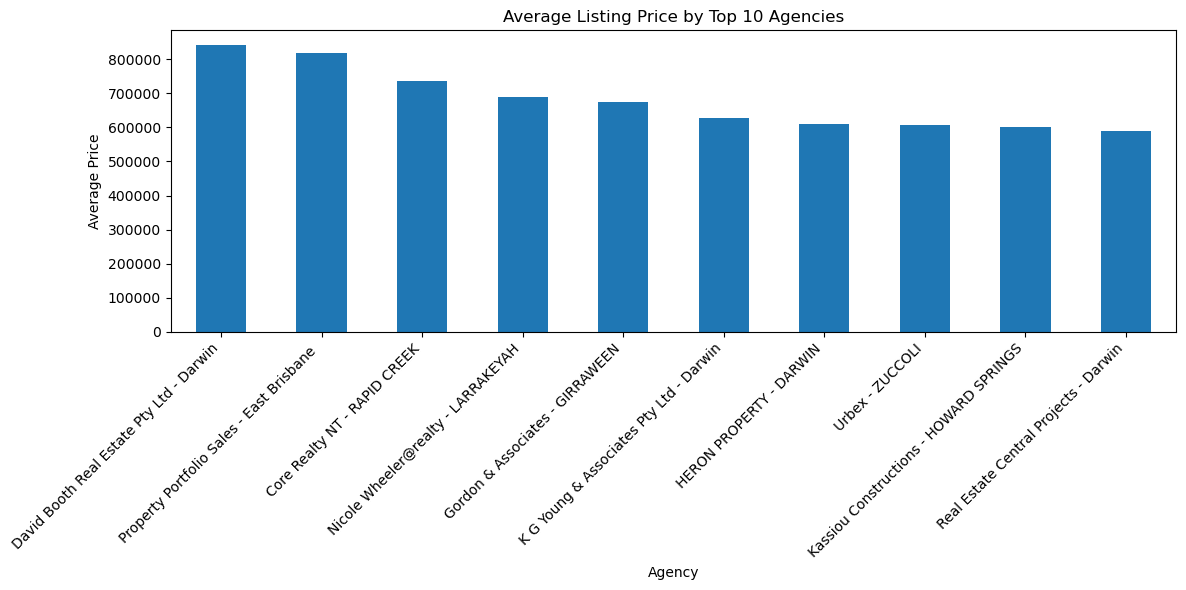

In [9]:
plt.figure(figsize=(12, 6))
df.groupby('listing_agency')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Listing Price by Top 10 Agencies')
plt.xlabel('Agency')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Fig2.png")
plt.show()